# Задание
Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

In [1]:
import numpy as np
import torch
from torch import nn
import torchvision as tv
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE = 256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

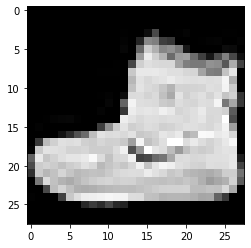

In [4]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [14]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
  )
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): ReLU()
  (2): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=784, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [16]:
num_epoch = 10

for ep in range(num_epoch):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        optimizer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        optimizer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print(f"epoch: {ep + 1} >>> train_loss: {train_loss / train_iters}...train_acc: {train_acc / train_passed}...test_loss: {test_loss / test_iters}...test_acc: {test_acc / test_passed}")

epoch: 1 >>> train_loss: 0.47444397971985186...train_acc: 0.8305833333333333...test_loss: 0.39182459823787213...test_acc: 0.8555
epoch: 2 >>> train_loss: 0.3403026487599028...train_acc: 0.87655...test_loss: 0.3605284009128809...test_acc: 0.8679
epoch: 3 >>> train_loss: 0.2978569799915273...train_acc: 0.89215...test_loss: 0.343442645855248...test_acc: 0.875
epoch: 4 >>> train_loss: 0.26734371901826653...train_acc: 0.9032833333333333...test_loss: 0.3340840807184577...test_acc: 0.8769
epoch: 5 >>> train_loss: 0.24331670669799155...train_acc: 0.91215...test_loss: 0.33076370023190976...test_acc: 0.8807
epoch: 6 >>> train_loss: 0.2226033499266239...train_acc: 0.9196166666666666...test_loss: 0.3314151420257986...test_acc: 0.8823
epoch: 7 >>> train_loss: 0.20467085730522236...train_acc: 0.9273166666666667...test_loss: 0.3372072990052402...test_acc: 0.8837
epoch: 8 >>> train_loss: 0.18889287152188888...train_acc: 0.9329...test_loss: 0.3435307513922453...test_acc: 0.8838
epoch: 9 >>> train_loss: